# Interpolation Techniques
Author: Ian McAtee <br />
Date: 3/1/2025

## Initial Setup

In [8]:
# # Import necessary packages
import numpy as np
import matplotlib.pyplot as plt
import math
import cv2

savePath = "./Images"

## Test Data Setup

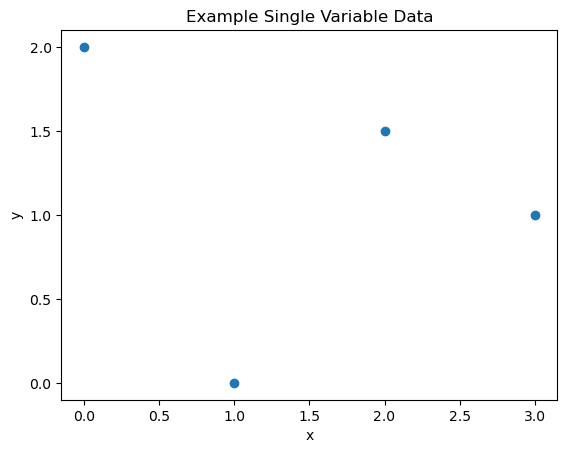

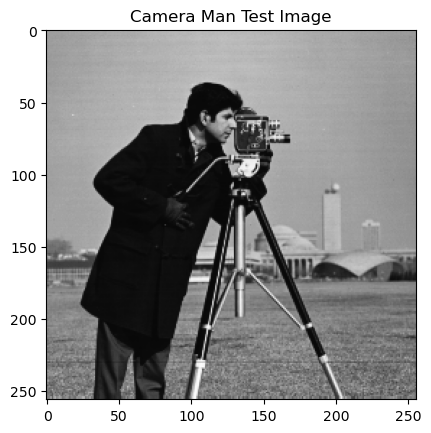

In [9]:
# Form single variable test data
TEST_Y = np.array([2, 0, 1.5, 1])
TEST_X = np.arange(len(TEST_Y))


#Load in camera man test image using OpenCV
testImgPath = savePath + "/cameraman.tif"
CAMERAMAN_TEST_IMG = cv2.imread(testImgPath, cv2.IMREAD_GRAYSCALE)

# Form a 5x5 squares test image
SQUARES_TEST_IMG = np.array([[0,  0,  0,  0,0],
                    [0,127,127,127,0],
                    [0,127,255,127,0],
                    [0,127,127,127,0],
                    [0,  0,  0,  0,0]])

# Save test images
cv2.imwrite(savePath+"/SquaresImgOriginal5x5.png", SQUARES_TEST_IMG)
cv2.imwrite(savePath+"/CameraImgOriginal256x256.png", CAMERAMAN_TEST_IMG)

# Plot single variable data
plt.scatter(TEST_X, TEST_Y)
plt.title("Example Single Variable Data")
plt.xlabel("x")
plt.ylabel("y")
plt.xticks(np.arange(0,3.5,0.5))
plt.yticks(np.arange(0,2.5,0.5))
plt.show()

#Plot cameraman test image
plt.imshow(CAMERAMAN_TEST_IMG, cmap='gray', vmin=0, vmax=255)
plt.title("Camera Man Test Image")
plt.show()

## Single Variable Nearest Neighbor Interpolation

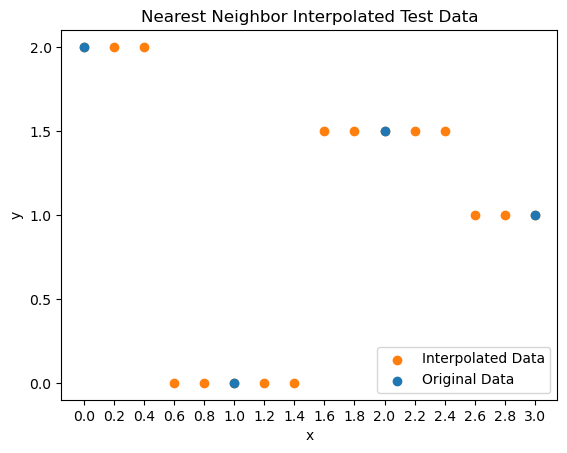

In [12]:
# Single variable nearest neighbor interpolation function
def nearest_neighbor_interp(signal: np.ndarray, newLen: int) -> tuple:
  '''
  Performs nearest neighbor interpolation on a single variable signal.
  Assumes a uniform sampled signal.

  Args:
    signal (np.ndarray): The signal to be interpolated
    newLen (int): The new length for the interpolated signal
  Returns:
    interpSignal (np.ndarray): The interpolated signal
    newXIdxs (np.ndarray): The new x indices for the interpolated signal
  '''
  interval = (len(signal)-1)/(newLen-1)
  interpSignal = np.zeros(newLen)
  for i in range(newLen):
    nearestIdx = int(round(i * interval))
    interpSignal[i] = signal[nearestIdx]
  newXIdxs = np.linspace(0, len(signal)-1, num=newLen)
  return interpSignal, newXIdxs

# Nearest neighbor interpolate the test data to a new length of 16
newLen = 16
nnInterpSignal, nnInterpXIdxs = nearest_neighbor_interp(TEST_Y, newLen)

# Plot the original and nearest neighbor interpolated data
plt.scatter(nnInterpXIdxs, nnInterpSignal, c="tab:orange")
plt.scatter(TEST_X, TEST_Y, c="tab:blue")
plt.title("Nearest Neighbor Interpolated Test Data")
plt.legend(["Interpolated Data", "Original Data"], loc = "lower right")
plt.xlabel("x")
plt.ylabel("y")
plt.xticks(nnInterpXIdxs)
plt.yticks(np.arange(0,2.5,0.5))
plt.show()

## Image Nearest Neighbor Interpolation

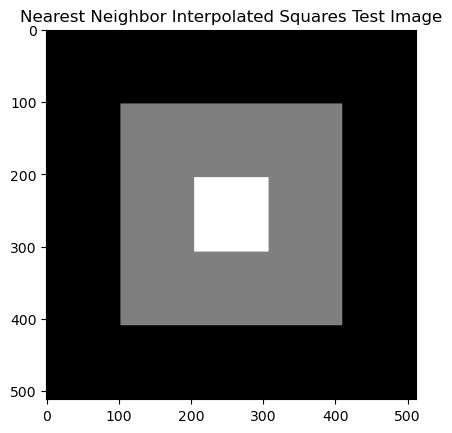

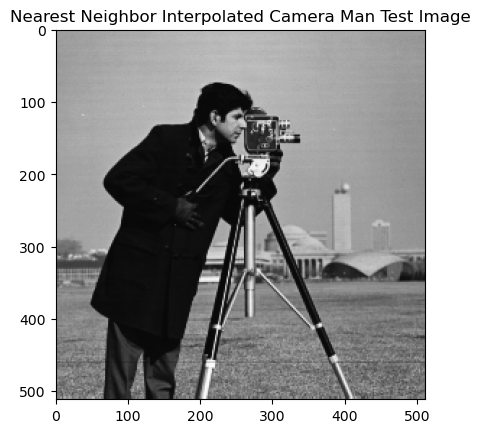

In [11]:
# Image nearest neighbor interpolation function
def nearest_neighbor_interp2(img: np.ndarray, newShape: tuple) -> np.ndarray:
  interpImg = np.zeros(newShape)
  xInterval = (img.shape[1])/(newShape[1])
  yInterval = (img.shape[0])/(newShape[0])
  for y in range(newShape[0]):
    for x in range(newShape[1]):
      nearestYIdx = math.floor(y*yInterval)
      nearestXIdx = math.floor(x*xInterval)
      interpImg[y,x] = img[nearestYIdx, nearestXIdx]
  return interpImg

# Nearest neighbor interpolate the squares test image to size 512x512
newSize = (512,512)
nnInterpSquaresImg = nearest_neighbor_interp2(SQUARES_TEST_IMG, newSize)

# Nearest neighbor interpolate the cameraman test image to size 512x512
nnInterpCamImg = nearest_neighbor_interp2(CAMERAMAN_TEST_IMG, newSize)

# Plot the nearest neighbor interpolated squares test image
plt.imshow(nnInterpSquaresImg, cmap='gray', vmin=0, vmax=255)
plt.title("Nearest Neighbor Interpolated Squares Test Image")
plt.show()

# Plot the nearest neighbor interpolated cameraman test image
plt.imshow(nnInterpCamImg, cmap='gray', vmin=0, vmax=255)
plt.title("Nearest Neighbor Interpolated Camera Man Test Image")
plt.show()

## Linear Interpolation

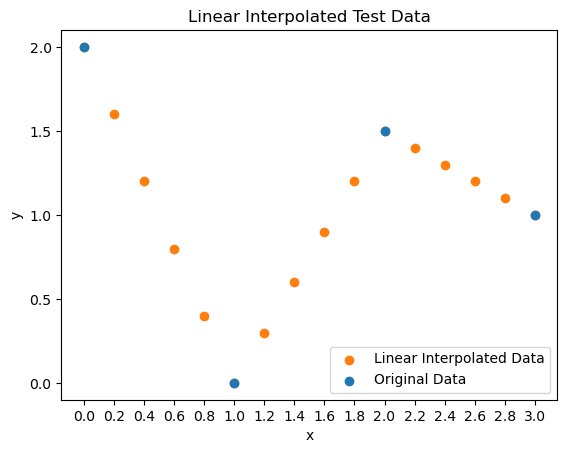

In [13]:
# Linear interpolation function
def linear_interp(signal: np.ndarray, newLen: int) -> tuple:
  interval = (len(signal)-1)/(newLen-1)
  interpSignal = np.zeros(newLen)
  for i in range(newLen):
    x = i*interval
    x0 = math.floor(x)
    x1 = math.ceil(x)
    if x0 == x1:
      interpSignal[i] = signal[x0]
      continue
    y0 = signal[x0]
    y1 = signal[x1]
    interpSignal[i] = y0+(x-x0)*((y1-y0)/(x1-x0))
  newXIdxs = np.linspace(0, len(signal)-1, num=newLen)
  return interpSignal, newXIdxs


# Nearest neighbor interpolate the test data to a new length of 16
newLen = 16
linearInterpSignal, linearInterpXIdxs = linear_interp(TEST_Y, newLen)

# Plot the original and linear interpolated data
plt.scatter(linearInterpXIdxs, linearInterpSignal, c="tab:orange")
plt.scatter(TEST_X, TEST_Y, c="tab:blue")
plt.title("Linear Interpolated Test Data")
plt.legend(["Linear Interpolated Data", "Original Data"], loc = "lower right")
plt.xlabel("x")
plt.ylabel("y")
plt.xticks(linearInterpXIdxs)
plt.yticks(np.arange(0,2.5,0.5))
plt.show()

## Bilinear Interpolation

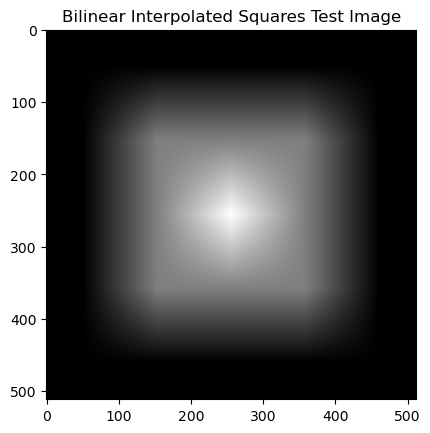

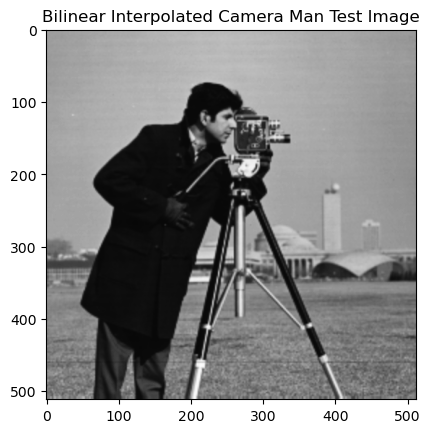

In [15]:
# Bilinear interpolation function
def bilinear_interp(img: np.ndarray, newShape: tuple) -> np.ndarray:
  xInterval = img.shape[1]/newShape[1]
  yInterval = img.shape[0]/newShape[0]

  # Interpolate across rows
  tempArr = np.zeros((img.shape[0], newShape[1]))
  for j in range(newShape[1]):
    x = (j+0.5)*(xInterval)-0.5
    if x <= 0 or x >= img.shape[1]-1:
      tempArr[:,j] = img[:,int(x)]
      continue
    x1 = math.floor(x)
    x2 = math.ceil(x)
    if (x1 == x2):
      tempArr[:,j] = img[:,x1]
      continue
    for i in range(img.shape[0]):
      tempArr[i,j] = (x2-x)*img[i,x1] + (x-x1)*img[i,x2]

  # Interpolate across columns
  interpImg = np.zeros((newShape[0], newShape[1]))
  for i in range(newShape[0]):
    y = (i+0.5)*(yInterval)-0.5
    if y <= 0 or y >= img.shape[0]-1:
      interpImg[i,:] = tempArr[int(y),:]
      continue
    y1 = math.floor(y)
    y2 = math.ceil(y)
    if (y1 == y2):
      interpImg[i,:] = tempArr[y1,:]
      continue
    for j in range(newShape[1]):
      interpImg[i,j] = (y2-y)*tempArr[y1,j] + (y-y1)*tempArr[y2,j]
  return interpImg

# Bilinear interpolate the squares test image to size 512x512
newSize = (512,512)
bilinearInterpSquaresImg = bilinear_interp(SQUARES_TEST_IMG, newSize)

# Nearest neighbor interpolate the cameraman test image to size 512x512
bilinearInterpCamImg = bilinear_interp(CAMERAMAN_TEST_IMG, newSize)

# Plot the nearest neighbor interpolated squares test image
plt.imshow(bilinearInterpSquaresImg, cmap='gray', vmin=0, vmax=255)
plt.title("Bilinear Interpolated Squares Test Image")
plt.show()

# Plot the nearest neighbor interpolated cameraman test image
plt.imshow(bilinearInterpCamImg, cmap='gray', vmin=0, vmax=255)
plt.title("Bilinear Interpolated Camera Man Test Image")
plt.show()

## Natural Cubic Spline Interpolation

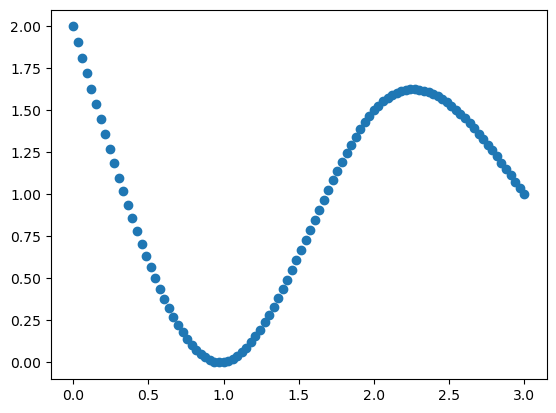

In [16]:
def natural_cubic_spline_interpolation_manual(x, y, num_points=100):
    n = len(x) - 1
    h = np.diff(x)

    # Calculate alpha
    alpha = [0] * (n + 1)
    for i in range(1, n):
        alpha[i] = (3 / h[i] * (y[i + 1] - y[i]) - 3 / h[i - 1] * (y[i] - y[i - 1]))

    # Tridiagonal matrix setup
    l = [1] + [0] * n
    mu = [0] * (n + 1)
    z = [0] * (n + 1)

    for i in range(1, n):
        l[i] = 2 * (x[i + 1] - x[i - 1]) - h[i - 1] * mu[i - 1]
        mu[i] = h[i] / l[i]
        z[i] = (alpha[i] - h[i - 1] * z[i - 1]) / l[i]

    l[n] = 1

    # Back substitution
    c = [0] * (n+1)
    b = [0] * n
    d = [0] * n
    a = y[:-1]

    for j in range(n - 1, -1, -1):
        c[j] = z[j] - mu[j] * c[j + 1]
        b[j] = (y[j + 1] - y[j]) / h[j] - h[j] * (c[j + 1] + 2 * c[j]) / 3
        d[j] = (c[j + 1] - c[j]) / (3 * h[j])

    # Interpolation
    x_interp = np.linspace(x[0], x[-1], num_points)
    y_interp = []

    for xi in x_interp:
        for j in range(n):
            if x[j] <= xi <= x[j + 1]:
                dx = xi - x[j]
                y_interp.append(a[j] + b[j] * dx + c[j] * dx**2 + d[j] * dx**3)
                break
    return x_interp, np.array(y_interp)


xIdx, interpTest = natural_cubic_spline_interpolation_manual(TEST_X, TEST_Y)


plt.scatter(xIdx, interpTest)
plt.show()



The length of the signal is: 6
The number of splines needed is: 5
The (a) coefficients are: [2.  0.  1.5 1.  0.5]
[0. 0. 0.]


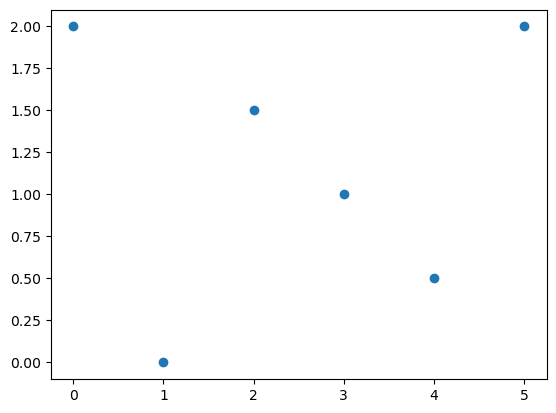

In [29]:
test_y = np.array([2, 0, 1.5, 1, 0.5, 2])
test_x = np.arange(len(test_y))



def natural_cubic_spline_interp(signal, newLen):
    print(f"The length of the signal is: {len(signal)}")
    n = len(signal)-1 # Number of splines needed
    print(f"The number of splines needed is: {n}")
    a = signal[0:n] # a = f(x)
    print(f"The (a) coefficients are: {a}")

    # Calculate c via Thomas Algorithm
    c = np.zeros(n)
    alpha = np.ones(n-2)
    beta = np.ones(n-2) * 4
    charlie = np.ones(n-2)
    delta = np.zeros(n-2)

    for i in range(0, n-2):
        delta[i] = 3*(a[i+2]-a[i+1]) - 3*(a[i+1]-a[i])

    
    # Forward substitution 
    for i in range(2, n-3):
        w = alpha[i]/beta[i-1]
        beta[i] = beta[i] - w*charlie[i-1]
        delta[i] = delta[i] -w*delta[i-1]

    x = np.zeros(n-2)
    x[-1] = delta[-1]/beta[-1]

    print(x)


natural_cubic_spline_interp(test_y, 16)

plt.scatter(test_x, test_y)
plt.show()